In [90]:
import numpy as np
import openturns as ot
from depimpact import ConservativeEstimate, quantile_func
from depimpact.tests import func_sum

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
dim = 2
grid_type = 'lhs'
dep_measure = 'kendall'
K = 20
n = 200000
alpha = 0.01

margins = [ot.Normal()]*dim
q_func = quantile_func(alpha)

Minimum quantile: -4.65834081252469 at param: [0.9404999999999998]
Minimum quantile: -4.660464523858869 at param: [0.9405000000000001]
Minimum quantile: -4.6096810082441495 at param: [0.9405000000000001]
Minimum quantile: -4.488654790722932 at param: [0.9405000000001502]
Minimum quantile: -4.491308747646842 at param: [0.9405000000000001]
Minimum quantile: -4.664344481855467 at param: [0.9405000000000001]
Minimum quantile: -4.656085536497756 at param: [0.9405000000001502]


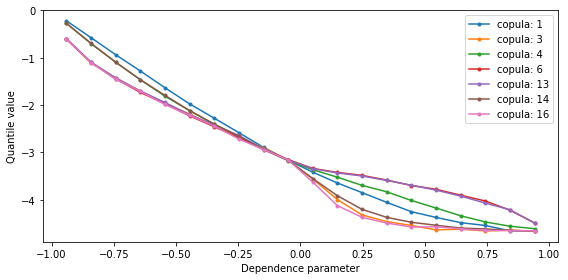

In [92]:
cop_ids = [1, 3, 4, 6, 13, 14, 16]
fig, ax = plt.subplots(figsize=(8, 4))
grid_results = {}
for cop_id in cop_ids:
    families = np.zeros((dim, dim), dtype=int)
    families[1, 0] = cop_id

    quant_estimate = ConservativeEstimate(model_func=func_sum, margins=margins, families=families)
    grid_result = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, dep_measure=dep_measure)
    grid_result.q_func = q_func
    min_result = grid_result.min_result
    print('Minimum quantile: {} at param: {}'.format(min_result.quantity, min_result.kendall_tau))
    
    kendalls = grid_result.kendalls
    sorted_items = np.argsort(kendalls.ravel())
    kendalls = kendalls[sorted_items]
    quantities = grid_result.quantities[sorted_items]    
    ax.plot(kendalls, quantities, '.-', label='copula: %d' % (cop_id))
    grid_results[cop_id] = grid_result
    
ax.set_xlabel('Dependence parameter')
ax.set_ylabel('Quantile value')
ax.legend(loc=0)
fig.tight_layout()

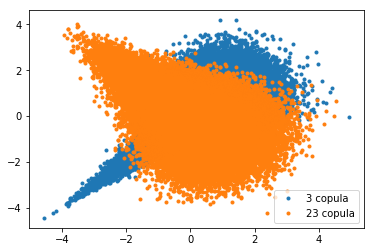

In [12]:
cop_id = 3
for cop_id in [3, 23]:
    x = grid_results[cop_id].input_samples[2]
    plt.plot(x[:, 0], x[:, 1], '.', label='%d copula' % (cop_id))
    plt.legend(loc=0)

In [84]:
dim = 4
families = np.tril(np.ones((dim, dim), dtype=int), k=-1)
families

families[np.triu_indices(dim, k=0)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])